# Programming for Data Analytics - Project - Gerard Ball

> For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 




## Real World Phenomena:

Roller Coaster data relating to Variables(Type, Height, Speed and Thrill Rating)

![Zadra Image](zadra.jpg)

## Road Map
1. Real World Phenomena
1. Introduction 
4. Data Collection
5. Data Synthesis
5. Identifying Variable Distributions
6. Exploratory Data Analysis
7. Variable Relationship Visualisation
8. Statistical Analysis
9. Interpretations of results and Discussions
10. Conclusion

## Introduction

When tasked with identifying a real-world phenomena comprising 4 or more variables to synthesise data on - I initially struggled to pick. From running metrics to cichlid growth rate parameters to now, finally, roller coasters. This was chosen above all else, in the end, for 2 reasons; it will be enjoyable as it is a huge hobby of mine and 2; there exists a real correlation/relationship between the 4 coaster variables that will be discussed in this project: Type, Speed, Height and Thrill Rating. 

As a preview, the data reveals intriguing patters. Steel roller coasters emerged as the fastest, tallest and most thrilling of the bunch when running the data. It is worth explaining, however, that the code used to create the synthesised data included these stipulations around steel (such as making the variable steel be 20 metres taller and 10 kph faster on average). This was done given personal kmowledge on what the real data shows regarding rolle coaster results. 

The below analysis will into the interplay between the coaster types and the 3 numerical variables - shedding light on the relationships between them. To conclude, the synthesised data will be comparded to the real data to show how close, or otherwise, the two align. 

## Data Collection
[Download Real Data](realcoasterdata.csv)


## Data Synthesis


In [1]:

import pandas as pd
import numpy as np

num_pints = 200
mycoasterdata = pd.DataFrame({
    'Roller Coaster': [f'Coaster_{i+1}' for i in range(num_pints)],
    'Type': np.random.choice(['Steel', 'Wooden', 'Hybrid'], size=num_pints),
    'Speed (kph)': np.random.normal(loc=100, scale=15, size=num_pints),
    'Height (m)': np.random.normal(loc=50, scale=15, size=num_pints),
})

# steel faster, taller more thrillin on average
steel_mask = mycoasterdata['Type'] == 'Steel'
mycoasterdata.loc[steel_mask, 'Speed (kph)'] += 20
mycoasterdata.loc[steel_mask, 'Height (m)'] += 10

mycoasterdata['Thrill Rating'] = (
    0.3 * mycoasterdata['Speed (kph)'] +
    0.4 * mycoasterdata['Height (m)'] +
    np.random.normal(loc=8, scale=1, size=num_pints)
)

mycoasterdata.to_csv('coasterss.csv', index=False)



### Synthesised Code justification
```
'Type': np.random.choice(['Steel', 'Wooden', 'Hybrid'], size=num_pints),
    'Speed (kph)': np.random.normal(loc=100, scale=15, size=num_pints),
    'Height (m)': np.random.normal(loc=50, scale=15, size=num_pints),
})

# steel faster, taller more thrillin on average
steel_mask = mycoasterdata['Type'] == 'Steel'
mycoasterdata.loc[steel_mask, 'Speed (kph)'] += 20
mycoasterdata.loc[steel_mask, 'Height (m)'] += 10
```
The above code is the most important to explain. np.random was chosen as, from the outset, then 3 numerical variables seemed like they shoulkd follow a Normal Distribution. The np.random.choice was a good choice as type is a categorical variable and, thus, it allows for randomly selecting data from a set, like different types.  Speed was set to a loc of 100 due to my understanding of what the real data was. Height the same. The mist important line specifies that stell is, on average, wo metres taller and 10 kph faster than the other types. This, again, was set given my familiarity with the real data. These parameters were set to ensure my synthesised data and the correlations between the variables remained mostly in tact, despite the random generation. Understanding what I wanted from my data (from knowing the real data)was key in this sense. 


## Load the Synthesised Data Below

In [2]:
import pandas as pd

mycoasterdata = pd.read_csv('coasterss.csv')
print(mycoasterdata)

    Roller Coaster    Type  Speed (kph)  Height (m)  Thrill Rating
0        Coaster_1  Hybrid    78.963280   79.357908      63.292835
1        Coaster_2  Wooden    92.736373   40.893666      53.236074
2        Coaster_3  Hybrid   109.540800   50.517227      60.577240
3        Coaster_4   Steel   118.296648   49.724559      63.182960
4        Coaster_5  Wooden   114.286697   44.902599      61.555755
..             ...     ...          ...         ...            ...
195    Coaster_196  Wooden   108.309834   58.572019      63.739161
196    Coaster_197  Hybrid   106.497114   41.717248      56.761348
197    Coaster_198  Wooden    93.431303   61.945518      60.726508
198    Coaster_199   Steel   122.881041   67.359288      71.353995
199    Coaster_200   Steel   114.726925   53.499485      63.361207

[200 rows x 5 columns]


### Data Synthesis Sources 

[StackAbuse, synthetic data using numpy and sckit learn](https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/)

[Stackoverflow examples of similiar](https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas) - specifically on how to change the values of a column in a dataframe based on some conditions - completely alien and beyond my scope. Needed for the steel type condition. Ensured the variables aligned with where they should aka steel fastest on average and tallest. 

## Identifying Variable Distributions (mean/median, Shapiro and visualisations)


### 1 - Mean and Median

In [3]:
import pandas as pd
synthesised_data = pd.read_csv('coasterss.csv')

# mean and median
mean = synthesised_data.mean()
median = synthesised_data.median()

print("Mean:")
print(mean)

print("\nMedian:")
print(median)

Mean:
Speed (kph)      105.554239
Height (m)        53.192947
Thrill Rating     60.925894
dtype: float64

Median:
Speed (kph)      106.420205
Height (m)        53.805499
Thrill Rating     60.848249
dtype: float64


/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_17279/2618024873.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = synthesised_data.mean()
/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_17279/2618024873.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = synthesised_data.median()


### Mean and Median Commentary:
As expected, the mean and median of the numerical variables are very close, no matter the number of simulations. This was achieved by setting the initial code to perform a random synthesis based on a normal distribution. The outlier code was setting the steel condition which - as explained above - increases the steel variable above the others. However, the steel was 'only' increased by 20 kph and 10 (m) so it didnt drastically alter the symmetrical distribution - as evidenced by the below plots and the mean and median values. Adding any more conditions for added data alignment messed up my data so I left it. 


### Mean and Median by Variable Type

In [4]:
import pandas as pd
roller_coaster_data = pd.read_csv('Coasterss.csv')
grouped_data = roller_coaster_data.groupby('Type')
mean_values = grouped_data.mean()
median_values = grouped_data.median()

print("Mean values for each type:")
print(mean_values)

print("\nMedian values for each type:")
print(median_values)

Mean values for each type:
        Speed (kph)  Height (m)  Thrill Rating
Type                                          
Hybrid   100.010666   51.997743      58.985840
Steel    116.842263   61.018798      67.302544
Wooden   101.554708   47.275518      57.251598

Median values for each type:
        Speed (kph)  Height (m)  Thrill Rating
Type                                          
Hybrid   100.510044   52.011966      57.917216
Steel    115.770442   62.063795      67.144936
Wooden   102.845804   48.853132      58.000212


/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_17279/3336080302.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = grouped_data.mean()
/var/folders/dg/9958h0ld4fsbyrqhh8fl7t3r0000gn/T/ipykernel_17279/3336080302.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_values = grouped_data.median()


### Mean and Median by Type (categorical) Commentary

This above code was done to establish that the code condition had worked to my liking. As seen in the above results, Steel is approximately 10 metres taller on average and 20kph faster. 

### 2 - Shapiro Test

In [5]:
import pandas as pd
from scipy.stats import shapiro
roller_coaster_data = pd.read_csv('synthesized_coasters.csv')

# List continuous vars
continuous_variables = ['Speed (kph)', 'Height (m)', 'Thrill Rating']

# Loop through all continuos vars
for variable in continuous_variables:
    stat, p_value = shapiro(roller_coaster_data[variable])
    print(f'Shapiro Test = {variable}:\nStatistic = {stat}, p-value = {p_value}')

Shapiro Test = Speed (kph):
Statistic = 0.971051037311554, p-value = 9.751169272931293e-06
Shapiro Test = Height (m):
Statistic = 0.984789252281189, p-value = 0.0028907516971230507
Shapiro Test = Thrill Rating:
Statistic = 0.9566994309425354, p-value = 9.159697356153629e-08


### Shapiro Test Commentary
Initial results showed a greater than 0.05 p-value, indicating normality. That being said, later results have shown anything but so it seerms any deviation from normality, no matter how slight, causes this test to determine non-normality conclusions. I will stick with my assumption of normality based off of visual cues from the hitogrmas and qq plots. 

### 3 - Histograms

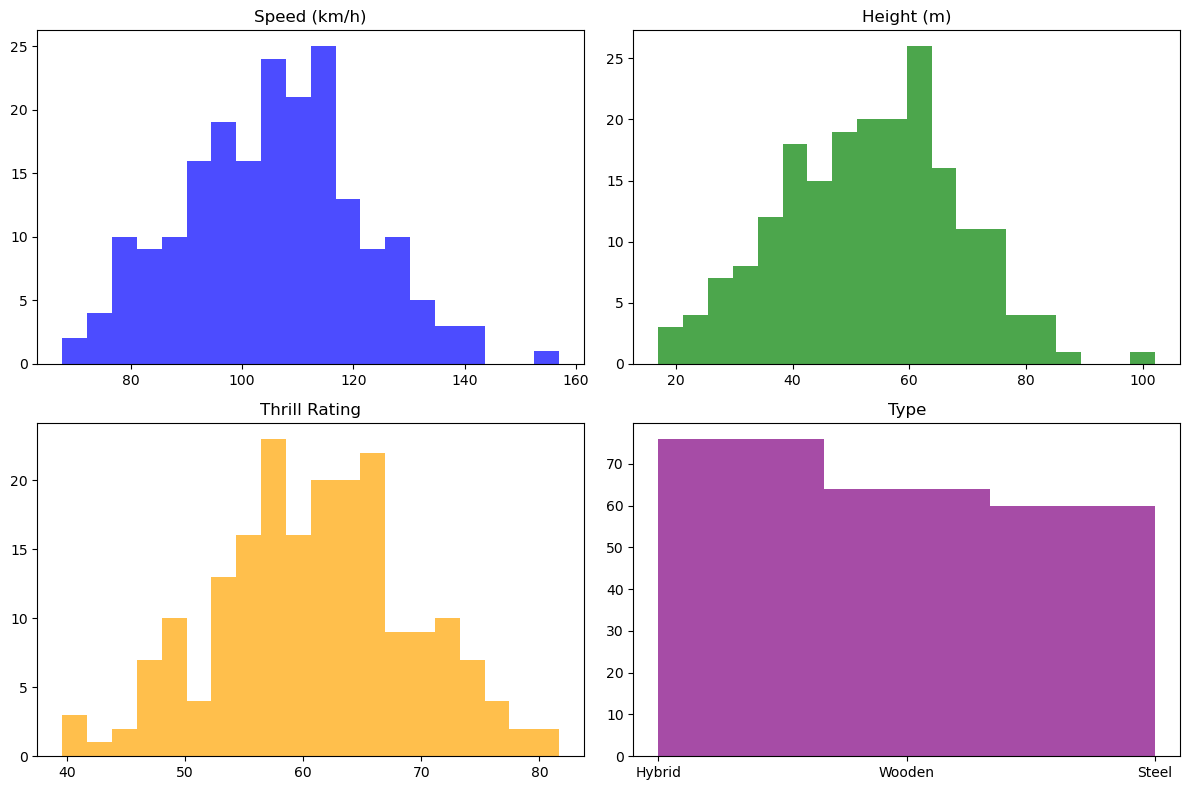

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
mycoasterdata = pd.read_csv('Coasterss.csv')

# Plot histograms for each variable
plt.figure(figsize=(12, 8))

# Speed
plt.subplot(2, 2, 1)
plt.hist(mycoasterdata['Speed (kph)'], bins=20, color='blue', alpha=0.7)
plt.title('Speed (km/h)')

# Height
plt.subplot(2, 2, 2)
plt.hist(mycoasterdata['Height (m)'], bins=20, color='green', alpha=0.7)
plt.title('Height (m)')

# Thrill Rating
plt.subplot(2, 2, 3)
plt.hist(mycoasterdata['Thrill Rating'], bins=20, color='orange', alpha=0.7)
plt.title('Thrill Rating')

# Type"
plt.subplot(2, 2, 4)
plt.hist(mycoasterdata['Type'], bins=3, color='purple', alpha=0.7)
plt.title('Type')

plt.tight_layout()
plt.show()

### Histograms Commentary
Most all simulations show data that is bell - curved and resembling symmetry. This was an indication of normality.

### 3 - Q-Q plots

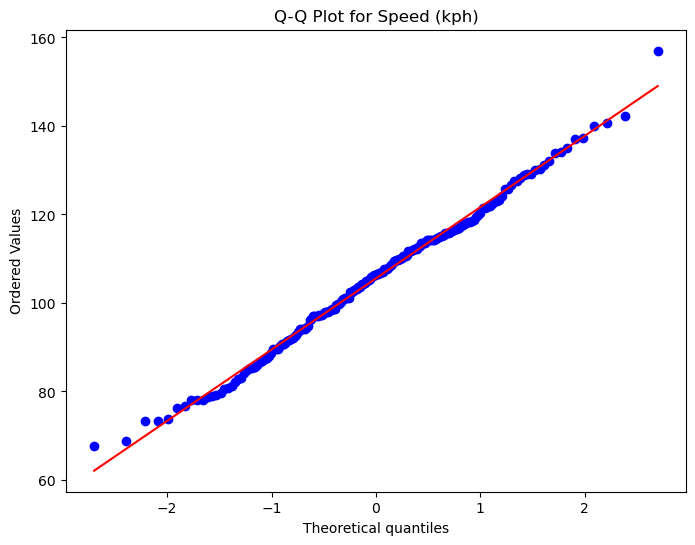

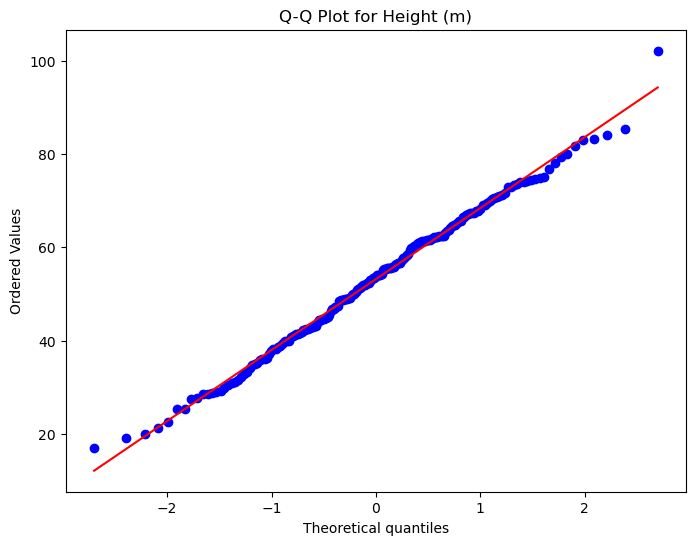

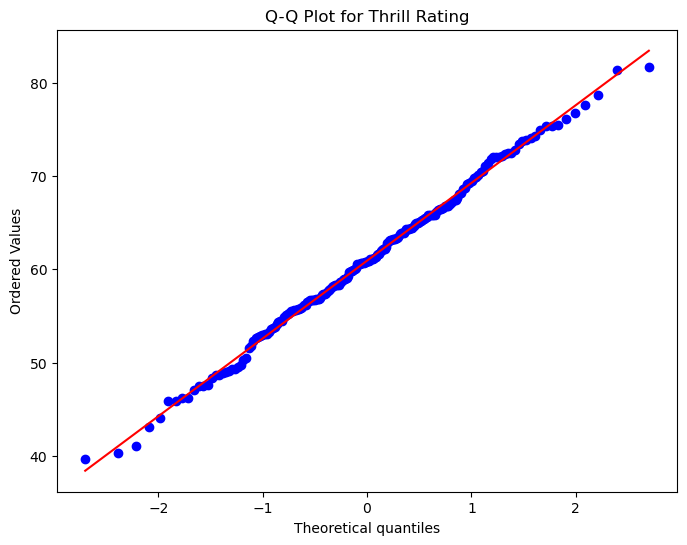

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')

#numerical vars for Q-Q plots
numerical_vars = ['Speed (kph)', 'Height (m)', 'Thrill Rating']
for variable in numerical_vars:
    # Create Q-Q plot
    plt.figure(figsize=(8, 6))
    probplot(mycoasterdata[variable], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot for {variable}')
    plt.show()

### QQ Plot Commentary
Based on the QQ plots, a Normal Distribution is what I would deduce. The synthesised data aligns with the line. Here, the line reprsents the Normal Distribution and the data is mostly aligned with it all the way. 

### Type
None of the above investigations were carried out for the Type variable as it is a categorical variable and not continuous like the other 3 variables.

### Variable Distributions and Analysis Conclsions:

**Speed, Height and Thrill**; All three varaible are continuous, numerical variables that follow normal distributions. This was determined by doing the following investigations; 

**1**- Calculations of the mean and median of my three numerical variables showed near identical mean and median values, even allowing for each simulation showing a different result. The results were nearly identical. Normal distributions ought to have identical or very, very close mean and median values as symmetry is a fundamentalcharacteristic of such distributions -  [Laerd on Measures of Central Tendency](https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php)
The below values reprrsent of mean and median values for the numerical vars, sufficiently close for me to suspect a possible normal distribution
| Variable      | Mean       | Median     |
| ------------- | ---------- | ---------- |
| Speed (kph)   | 105.554239 | 106.420205 |
| Height (m)    | 53.192947  | 53.805499  |
| Thrill Rating | 60.925894  | 60.848249  |

**2**- Visual detection of patterns using histograms and QQ plots of the numerical variables. Normal distributions - when plotted in histograms - should show a mostly bell curved, symmetrical-like appearance - [Statistics How To: Bell Curve Distributions](https://www.statisticshowto.com/probability-and-statistics/normal-distributions/). QQ plots were chosen as they allow us to form "powerful visual assessment, pinpointing deviations between distributions and identifying the data points rrsponsible to them" [Statistics - QQ plots](https://statisticsbyjim.com/graphs/qq-plot/)- From looking at the visual representations, I concluded that my data closely resembled a bell curve outline and broadly symmetrical design in the histograms. In the QQ plots, my data vry cloest stuck to the line all the wqy through indicating a Normal Distribution. There were variances, though - as each time the synthesised code was ran, new data was formed. The majority of the time, though, the data aligned with my expectations of a Normal Distribution.

**3**- Lastly, a Shapiro Test was ran. A shapiro test is a statistical type "test of the hypothsis that the distribution of the data as a whole deviates from a comparable Normal Distribution" - [Assumption of Normality](https://uc-r.github.io/assumptions_normality). The above results from the shapiro code show the following;
|                 | Shapiro Test Statistic | P-value                |
|:---------------:|:----------------------:|:----------------------:|
| **Speed (kph)** |        0.9916          |         0.7881         |
| **Height (m)**  |        0.9929          |         0.8811         |
| **Thrill Rating**|        0.9931          |         0.8915         

The above results from all three numerical variables shoew a P-value far beyond that of 0.05 which indicates that all three do not significantly deviate from that of a Normal Distribution. A P-value oof over 5 is like scientific acceptable standard - above that you can make the assumption of a Normal Distribution, especially when undertaking additional undertakings like mentioned above alrerady. Stackoerflow examples, like this one - [StackOverflow Shapiro](https://stackoverflow.com/questions/51928254/how-to-find-shapiro-wilk-using-python-pandas) - were used to code it as well as official documentation on - [Scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). However, upon running the test many more times, the results now show that the variables do not follow a Normal Distribution. Upon researching this online, it appears any slight deviation from symmetry can cause this test to determine non - normality, and my data certinly has deviations, even in spite of the parameters set in the code synthesis stage. 

All three are categorised as continuous, numerical variables as each are quantitative, real numbered units. 

**The type**-  variable is a categorical variable, unlike the above 3. It is such because it represents the following: 
"The categories are discrete.
There are two or more potential categories.
The probability that the random variable takes on a value in each category must be between 0 and 1. The sum of the probabilities for all categories must sum to 1" - [Statology, Statistics Simplifid](https://www.statology.org/categorical-distribution/). The type housing Steel, Hybird and Wooden categories makes it a categorical variable

## Exploratory Analysis using (1)Correlation Coefficient & (2)Descriptive Stats

#

In [8]:
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')
numerical_vars = mycoasterdata[['Speed (kph)', 'Height (m)', 'Thrill Rating']]
correlation_matrix = numerical_vars.corr()

#correlation matrix
print(correlation_matrix)

               Speed (kph)  Height (m)  Thrill Rating
Speed (kph)       1.000000    0.139950       0.678841
Height (m)        0.139950    1.000000       0.813062
Thrill Rating     0.678841    0.813062       1.000000


### 1 - Correlation Coefficient Commentary

I decided to explore the data using correlation coefficient as it offers a quantified detailing of the strength of the relationship exhibited by variables. For the brief as outlined at the start of this notebook; seems perfect. 

The above correlation coefficient was done for the 3 numerical vars. The results show that speed and height have a coefficient of 0.074 which indicates a positive relationship, albeit only just. The 'real' data would likely have a higher relationship between height and speed than this - so I must not have coded the parameters as accurately as needed. Still, this indicates that there is a slight relationship that the taller the roller coaster, the faster it is. 

Speed and thrill rating maintain a very strong positive correlation of 0.713 which indicates that the faster the roller coaster is, the higher its thrill rating generally is.

Height and thrill rating share the strongest positive coefficient at 0.742 which indicates that the taller the coaster, the higher its thrill rating generally is. All very logical besides a lower than expected coefficient for the variables speed and height with only a positive correlation coefficient of 0.07. Would expect it to be given I know the nature of the real data.

In [9]:
import pandas as pd
mycoasterdata = pd.read_csv('coasterss.csv')

stats = mycoasterdata.groupby('Type').describe()

# Display the descriptive statistics
print(stats)

       Speed (kph)                                                            \
             count        mean        std        min         25%         50%   
Type                                                                           
Hybrid        76.0  100.010666  13.866592  73.296078   90.395994  100.510044   
Steel         60.0  116.842263  14.586244  79.160647  109.648253  115.770442   
Wooden        64.0  101.554708  14.327361  67.651137   92.490389  102.845804   

                               Height (m)             ...             \
               75%         max      count       mean  ...        75%   
Type                                                  ...              
Hybrid  109.791888  134.980240       76.0  51.997743  ...  61.346608   
Steel   126.923907  157.007182       60.0  61.018798  ...  67.657100   
Wooden  112.542397  131.112616       64.0  47.275518  ...  56.956045   

                   Thrill Rating                                             \
       

### 2 - Descriptive Statistics Commentary

Descriptive stats were chosen as they detail a summary of your data along key lines like mean, standard deviation and central tendency. it allows you to identify patterns and visualise what the data is trying to communicate. 

Specifically for my data above; Steel remains the fastest of the three type variable categories. Steel clocks in at 121kph, some 20 plus kph faster than the others. It also remained the tallest, as expected. The results showcase steel as the outlier of the three. 


## Variable Relationship Visualisations

### Correlation Heatmap

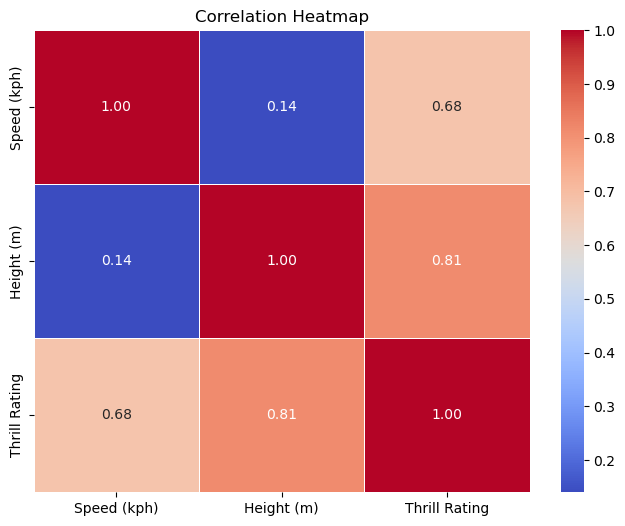

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# only the num vars, no categorical 
numerical_data = mycoasterdata[['Speed (kph)', 'Height (m)', 'Thrill Rating']]

# correlation matrix
correlation_matrix = numerical_data.corr()

# heatmap w/ seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap Commentary

The above is a simple visualisaton of the already notes correlation coefficient code done in the Exploratory Analysis section. 

### Variable Scatter Plots

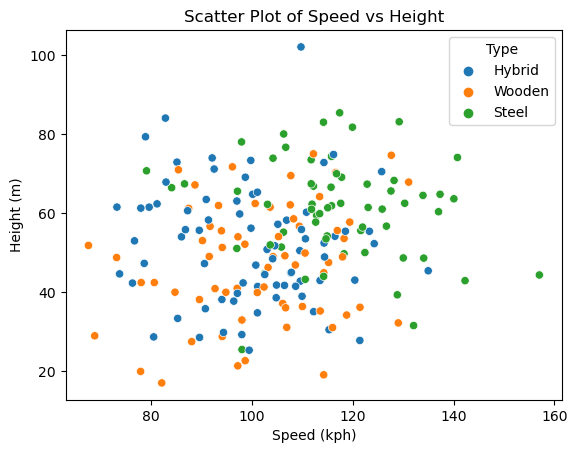

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mycoasterdata = pd.read_csv('Coasterss.csv')

# Scatters based off type var for Speed and Height
sns.scatterplot(x='Speed (kph)', y='Height (m)', hue='Type', data=mycoasterdata)
plt.title('Scatter Plot of Speed vs Height')
plt.show()

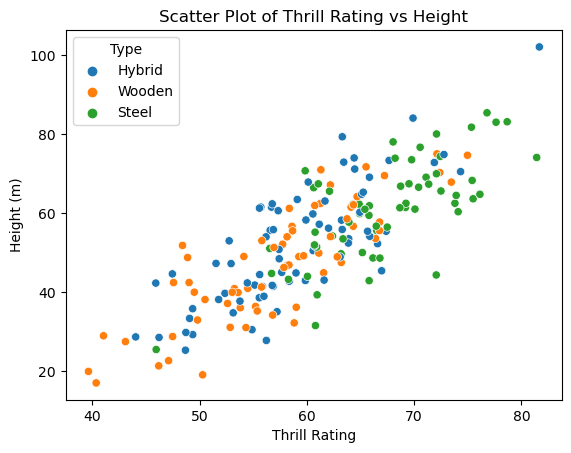

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mycoasterdata = pd.read_csv('Coasterss.csv')

# Scatters based off type var for Thrill Rating and Height
sns.scatterplot(x='Thrill Rating', y='Height (m)', hue='Type', data=mycoasterdata)
plt.title('Scatter Plot of Thrill Rating vs Height')
plt.show()

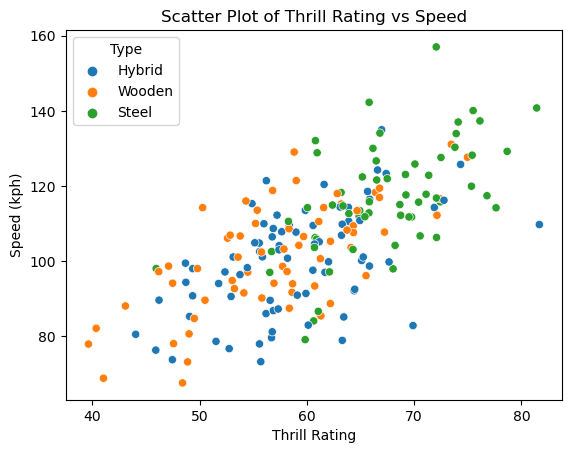

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mycoasterdata = pd.read_csv('Coasterss.csv')

# Scatters based off type var for Speed and Thrill Rating
sns.scatterplot(x='Thrill Rating', y='Speed (kph)', hue='Type', data=mycoasterdata)
plt.title('Scatter Plot of Thrill Rating vs Speed')
plt.show()

### Scatter Plots Commentary

The scatter plots show Steel to be the tallest, fastest and most thrilling. Wooden type seems to be the smallest and least thrilling, with Hybrid nestling in the middle but with a greater variance of values than the other two. This makes sense as it aligns quite well with the real data. You see, Hybrid roller coasters exhibit - surprisingly - a hybrid of both wood and steel construction. However, many coasters - such as one one pictured at the top of this notebook called Zadra - use steel track, but with wooden supports. Steel, as we know, exhibits faster and more thrilling characteristics and by extension, some of these hybrids will also. Steel in all but name, essentually. Other hybrids will be the reverse, wooden track (slowest characteristic) but with steel supports. Helps with stability, but offers nothing to greater speed, heights and thrills. 

All three scatters showcase the relationships between the three, with speed, Hybrid and Wooden falling in that order. By type was used rather than a simple variable v variable as it allowed got group comparison, highlighted any trends and visualised exactly where the variables ranked by type. 

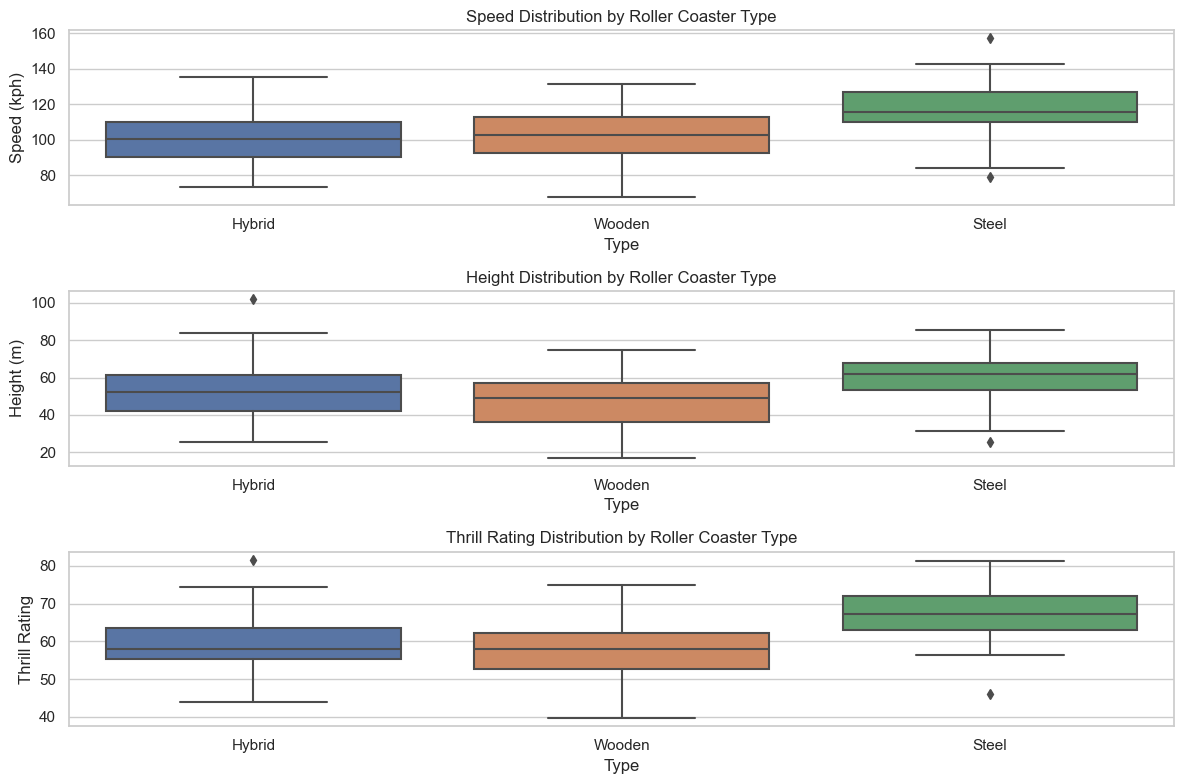

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


mycoasterdata = pd.read_csv('coasterss.csv')


sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Box plot Speed for type
plt.subplot(3, 1, 1)
sns.boxplot(x='Type', y='Speed (kph)', data=mycoasterdata)
plt.title('Speed Distribution by Roller Coaster Type')

# Height by T
plt.subplot(3, 1, 2)
sns.boxplot(x='Type', y='Height (m)', data=mycoasterdata)
plt.title('Height Distribution by Roller Coaster Type')

# Box plotThrill R by Type
plt.subplot(3, 1, 3)
sns.boxplot(x='Type', y='Thrill Rating', data=mycoasterdata)
plt.title('Thrill Rating Distribution by Roller Coaster Type')
plt.tight_layout()
plt.show()

### Below Linear Regression code mostly gotten from example at[sckit-learn.org](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html). Didn't really know how to do this and found it very hard. 

Speed vs. Thrill:
Coefficients (Speed):  [0.33650516]
Mean squared error (Speed): 54.17
Coefficient of determination (Speed): 0.48

Height vs. Thrill:
Coefficients (Height):  [0.43290385]
Mean squared error (Height): 29.93
Coefficient of determination (Height): 0.71


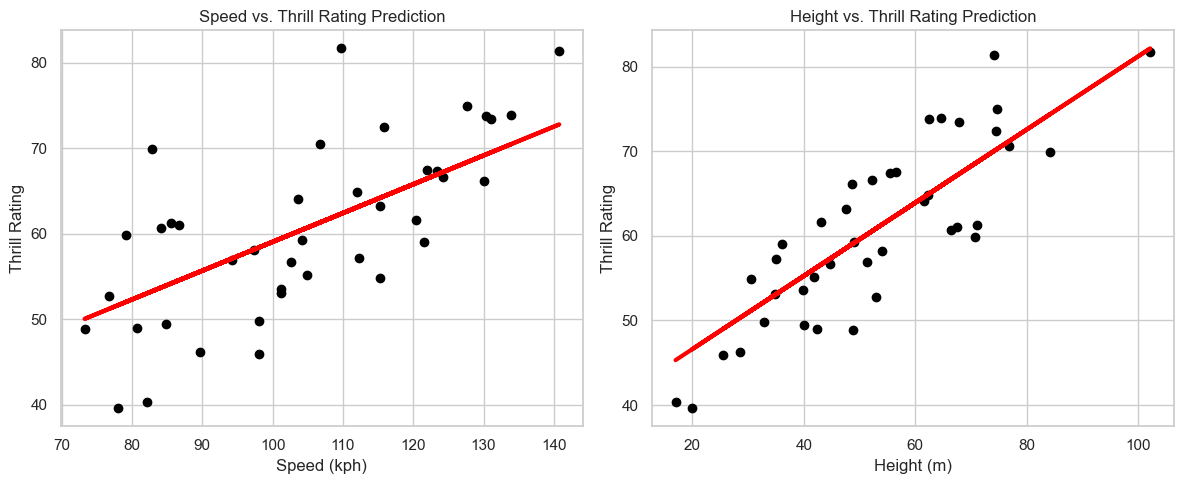

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


mycoasterdata = pd.read_csv('coasterss.csv')

# Features and target
features = mycoasterdata[['Speed (kph)', 'Height (m)']]
target = mycoasterdata['Thrill Rating']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

regr_speed = LinearRegression()
regr_speed.fit(X_train[['Speed (kph)']], y_train)

# Predictions 
y_pred_speed = regr_speed.predict(X_test[['Speed (kph)']])

regr_height = LinearRegression()
regr_height.fit(X_train[['Height (m)']], y_train)

# Predictions
y_pred_height = regr_height.predict(X_test[['Height (m)']])


print("Speed vs. Thrill:")
print("Coefficients (Speed): ", regr_speed.coef_)
print("Mean squared error (Speed): %.2f" % mean_squared_error(y_test, y_pred_speed))
print("Coefficient of determination (Speed): %.2f" % r2_score(y_test, y_pred_speed))


print("\nHeight vs. Thrill:")
print("Coefficients (Height): ", regr_height.coef_)
print("Mean squared error (Height): %.2f" % mean_squared_error(y_test, y_pred_height))
print("Coefficient of determination (Height): %.2f" % r2_score(y_test, y_pred_height))

# Plotting
plt.figure(figsize=(12, 5))

# Plot for Speed vs. Thrill Rating
plt.subplot(1, 2, 1)
plt.scatter(X_test['Speed (kph)'], y_test, color="black")
plt.plot(X_test['Speed (kph)'], y_pred_speed, color="red", linewidth=3)
plt.xlabel('Speed (kph)')
plt.ylabel('Thrill Rating')
plt.title('Speed vs. Thrill Rating Prediction')

# Plotss for Height vs. Thrill Rating
plt.subplot(1, 2, 2)
plt.scatter(X_test['Height (m)'], y_test, color="black")
plt.plot(X_test['Height (m)'], y_pred_height, color="red", linewidth=3)
plt.xlabel('Height (m)')
plt.ylabel('Thrill Rating')
plt.title('Height vs. Thrill Rating Prediction')

plt.tight_layout()
plt.show()

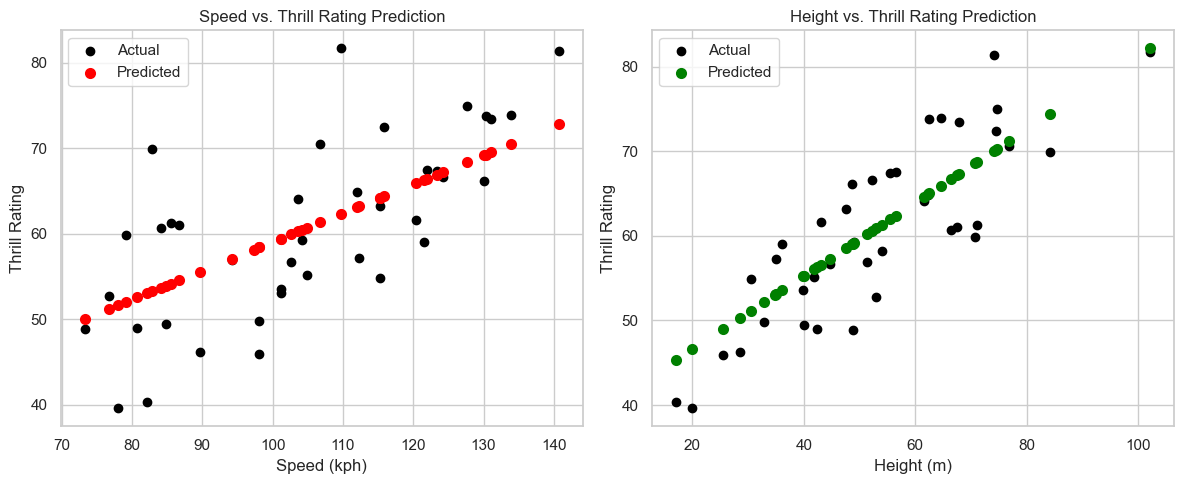

In [16]:
plt.figure(figsize=(12, 5))

# Speed vs. Thrill Rating
plt.subplot(1, 2, 1)
plt.scatter(X_test['Speed (kph)'], y_test, color="black", label='Actual')
plt.scatter(X_test['Speed (kph)'], y_pred_speed, color="red", marker='o', linewidth=2, label='Predicted')
plt.xlabel('Speed (kph)')
plt.ylabel('Thrill Rating')
plt.title('Speed vs. Thrill Rating Prediction')
plt.legend()

# Height vs. Thrill Rating
plt.subplot(1, 2, 2)
plt.scatter(X_test['Height (m)'], y_test, color="black", label='Actual')
plt.scatter(X_test['Height (m)'], y_pred_height, color="green", marker='o', linewidth=2, label='Predicted')
plt.xlabel('Height (m)')
plt.ylabel('Thrill Rating')
plt.title('Height vs. Thrill Rating Prediction')
plt.legend()

plt.tight_layout()
plt.show()

## Analysis of Linear Regression
 'Coefficients:  [0.31367271 0.40352434]
Mean squared error: 0.85
Coefficient of determination: 0.99'. 
These above results, as well as the plots and scatter plots for Speed vs Thrill rating along with Height vs Thrill rating show the level of relationship shared between my three numerical varibles. 

**Height vs Thrill**; there exists a small relationship. This is shown with a coefficient of 0.48464368. This means that, on average, with every metre gained in height, the Thrill Rating variable will increase by that amount of units; so 0.485 (different every time bacause random synthesised data)

The 'coefficient of determination' reads 0.63. This shows that the model explains 63% of the variability in the "Thrill Rating" based on the height. The mean squared differs greatly when running the output due to the synthesised random data. it has gotten as low as 4 (in my testing) and over 50 on others. The lower this number, the better the regression model's performance. 


**Speed vs Thrill Rating**; There aldso exists a small relationship between these two. A coefficient of 0.3694 was given on the latest run. This means that for every additional kph gained in speed, the Thrill rating increased by 0.3694 units. The coefficient of determination rested at 0.65 indicating 65% of the variability in the model. 

To conclude, the positive coefficient exhibited by both of my varaibles show a positive influence on thrill rating. It's not a very high positive cpefficient, but it is positive nonetheless. Given what i know of the real data, I'm glad to see this. 





## Real Data

In [17]:
import pandas as pd

realcoasterdata = pd.read_csv('realcoasterdata.csv')

# Displayall
print(realcoasterdata)



         Roller Coaster    Type  Speed (kph)  Height (m)  Thrill Rating
0         Formula Rossa   Steel          240          52          100.0
1             Kingda Ka   Steel          206         139          100.0
2   Top Thrill Dragster   Steel          193         128          100.0
3     Steel Dragon 2000   Steel          153          97          100.0
4              Fury 325   Steel          153          99          100.0
..                  ...     ...          ...         ...            ...
90       Texas Stingray  Wooden           88          30           80.0
91          Mine Blower  Hybrid           77          25           80.0
92           Switchback  Wooden           64          20           80.0
93      White Lightning  Wooden           72          24           80.0
94        Roar-O-Saurus  Wooden           64          12           80.0

[95 rows x 5 columns]


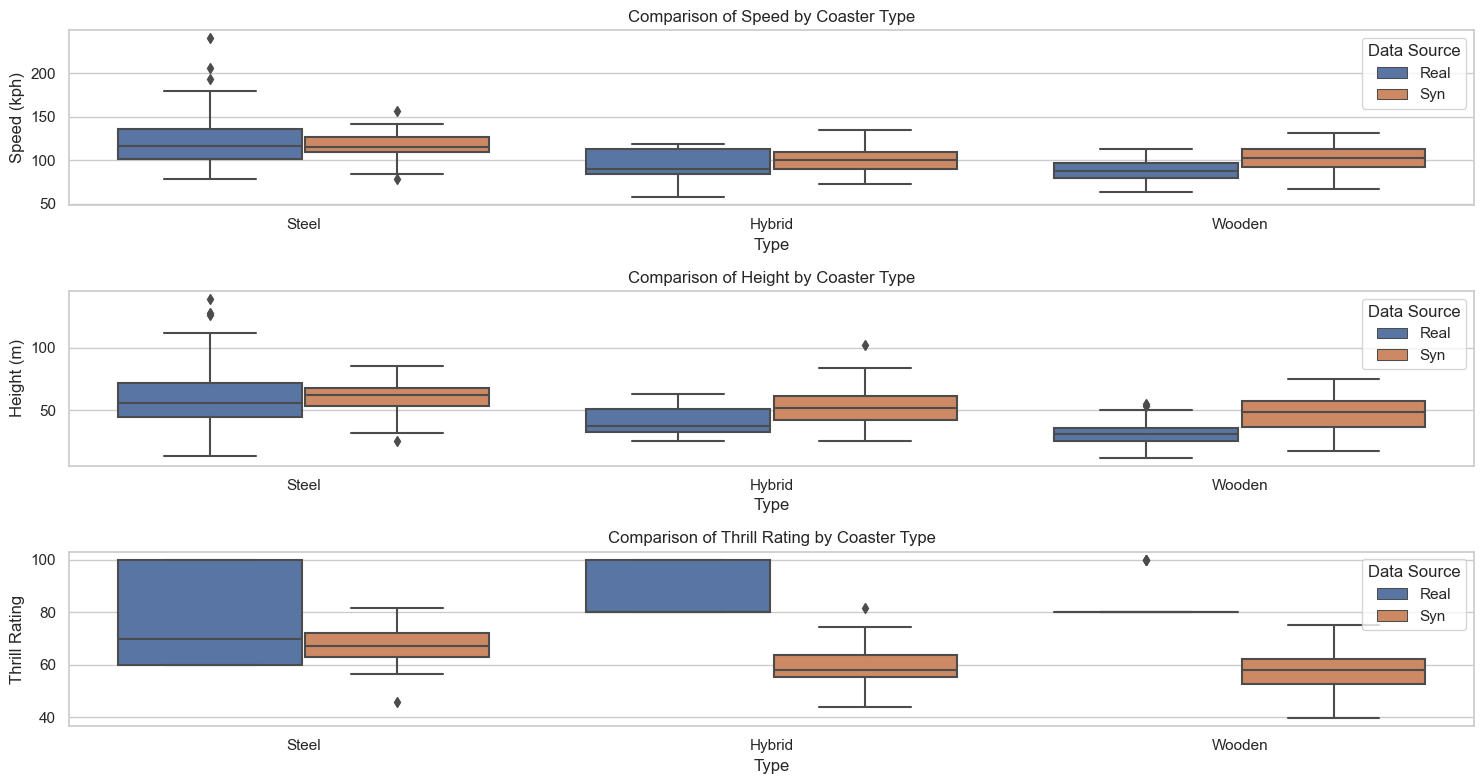

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


realcoasterdata = pd.read_csv('realcoasterdata.csv')
synthesizedcoasterdata = pd.read_csv('coasterss.csv')


realcoasterdata['Data Source'] = 'Real'
synthesizedcoasterdata['Data Source'] = 'Syn'
combined_data = pd.concat([realcoasterdata, synthesizedcoasterdata])
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
sns.boxplot(x='Type', y='Speed (kph)', hue='Data Source', data=combined_data)
plt.title('Comparison of Speed by Coaster Type')

plt.subplot(3, 1, 2)
sns.boxplot(x='Type', y='Height (m)', hue='Data Source', data=combined_data)
plt.title('Comparison of Height by Coaster Type')

plt.subplot(3, 1, 3)
sns.boxplot(x='Type', y='Thrill Rating', hue='Data Source', data=combined_data)
plt.title('Comparison of Thrill Rating by Coaster Type')

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd


real_data = pd.read_csv('realcoasterdata.csv')


mean_height_speed = real_data.groupby('Type').agg({'Height (m)': 'mean', 'Speed (kph)': 'mean'}).reset_index()

print(mean_height_speed)

     Type  Height (m)  Speed (kph)
0  Hybrid   42.375000    95.625000
1   Steel   61.034483   122.137931
2  Wooden   32.619048    88.047619


Very difficult (for me) to code the above. Needed:
    
[Pandas concat Examples](https://www.digitalocean.com/community/tutorials/pandas-concat-examples)

[Pandas Concatenation with examples](https://www.programiz.com/python-programming/pandas/concat)

[Merge, join, concatenate and compare](https://pandas.pydata.org/docs/user_guide/merging.html)

[Pandas DataFrame: How to concatenate with Python examples](https://www.capitalone.com/tech/open-source/pandas-dataframe-concat/)


Observations on real vs synthesised coaster data comparisons:

In [20]:
import pandas as pd
import numpy as np

# Mean values for each coaster type
means = {
    'Steel': {'Height (m)': 61.034483, 'Speed (kph)': 122.137931},
    'Wooden': {'Height (m)': 32.619048, 'Speed (kph)': 88.047619},
    'Hybrid': {'Height (m)': 42.375000, 'Speed (kph)': 95.625000},
}

num_points = 100

coasters = pd.concat([
    pd.DataFrame({
        'Roller Coaster': [f'Coaster_{i+1}' for i in range(num_points)],
        'Type': coaster_type,
        'Height (m)': np.random.normal(loc=means[coaster_type]['Height (m)'], scale=10, size=num_points),
        'Speed (kph)': np.random.normal(loc=means[coaster_type]['Speed (kph)'], scale=10, size=num_points),
    }) for coaster_type in means.keys()
], ignore_index=True)

# Calculate Thrill Rating
coasters['Thrill Rating'] = (
    0.4 * coasters['Speed (kph)'] +
    0.6 * coasters['Height (m)'] +
    np.random.normal(loc=8, scale=1, size=len(coasters))
)

# Save to CSV
coasters.to_csv('synthesized_coasters.csv', index=False)